### In this chapter, we will discuss the main concepts of regression models and cover the
    following topics:

    . Exploring and visualizing datasets
    . Looking at different approaches to implement linear regression models
    . Training regression models that are robust to outliers
    . Evaluating regression models and diagnosing common problems
    . Fitting regression models to nonlinear data

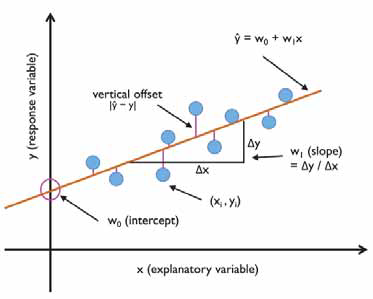

This best-fitting line is also called the regression line, and the vertical lines from the
regression line to the sample points are the so-called offsets or residuals—the errors
of our prediction.

Multiple linear regression
The special case of linear regression with one explanatory variable that we
introduced in the previous subsection is also called simple linear regression.

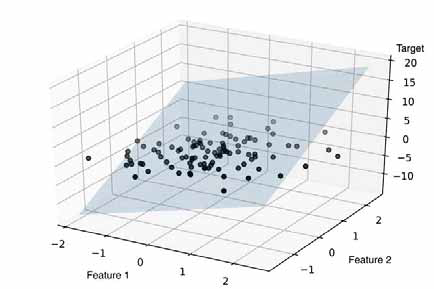

In [2]:
import pandas as pd

df = pd.read_csv('housing.data.txt', header=None, sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
                'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
                 'LSTAT', 'MEDV']

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


####    Exploratory Data Analysis (EDA)

c:\Users\Nazbeen-Ai\Documents\My Projects\Machine Learning Projects\Python Machine Learning Second Edition\.venv\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


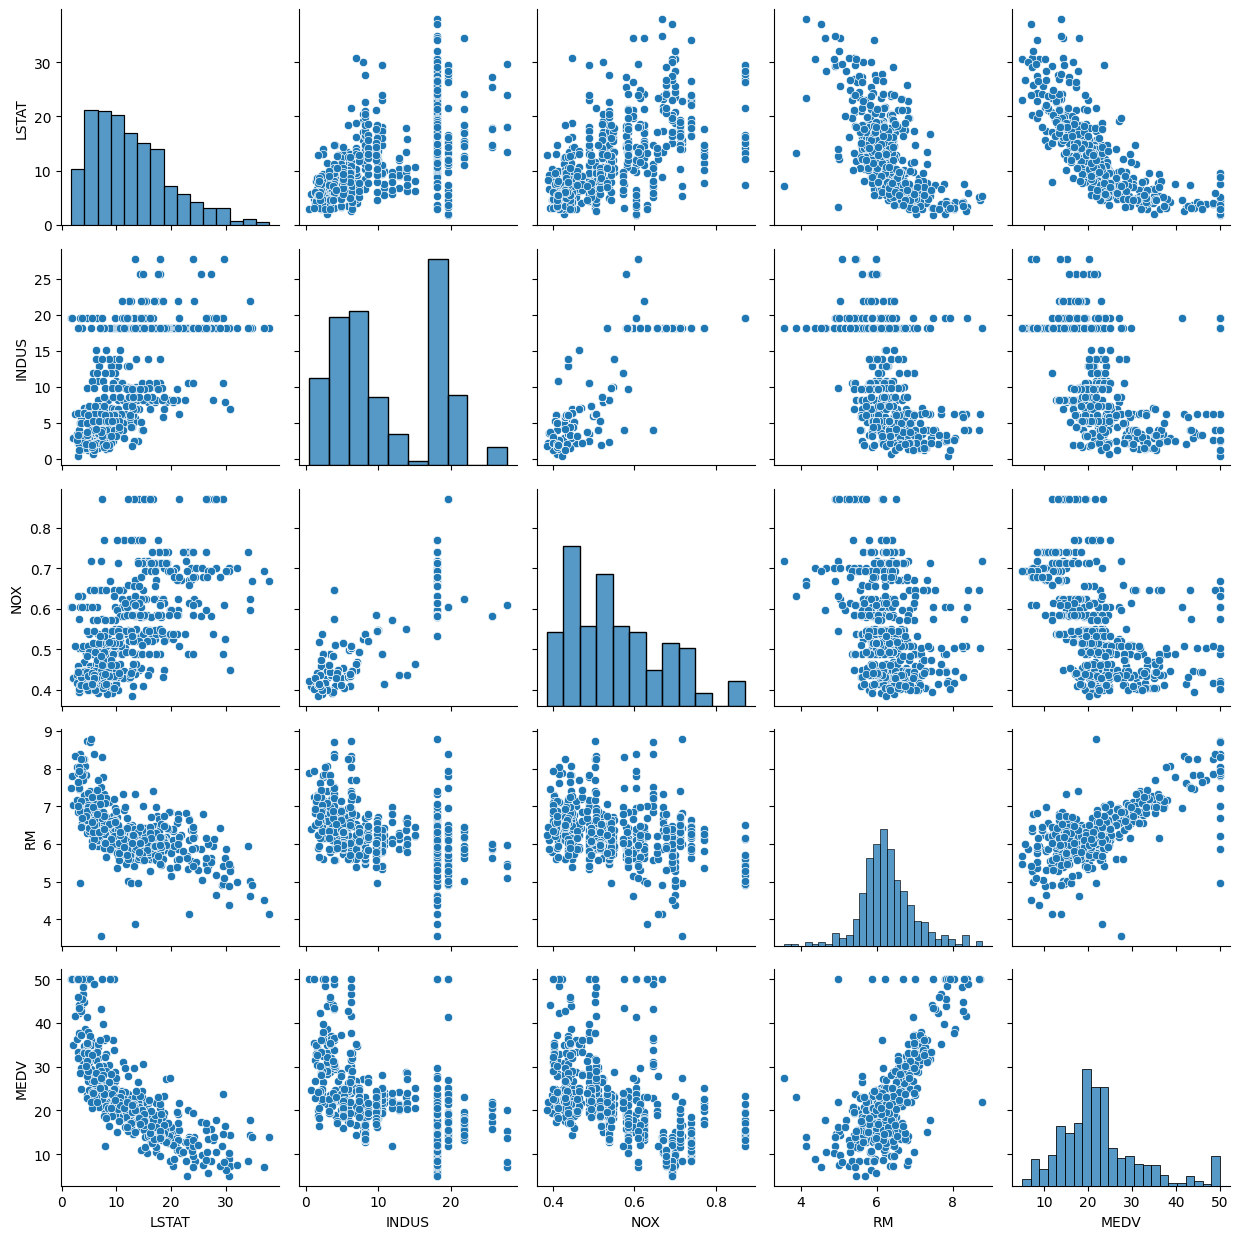

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()

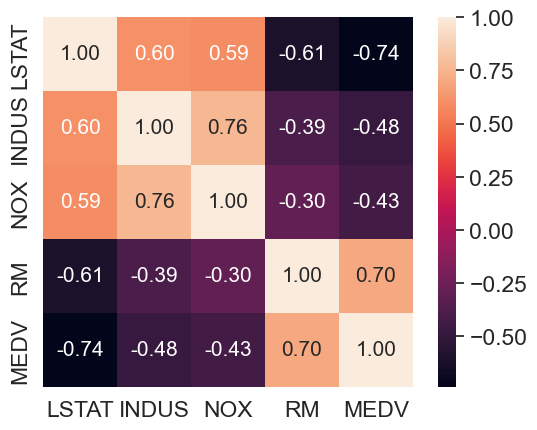

In [4]:
import numpy as np


cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size':15},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()

Solving regression for regression parameters
with gradient descent

In [8]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
       
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)

In [9]:
X = df[['RM']].values
y = df['MEDV'].values

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

lr = LinearRegressionGD()
lr.fit(X_std, y_std)

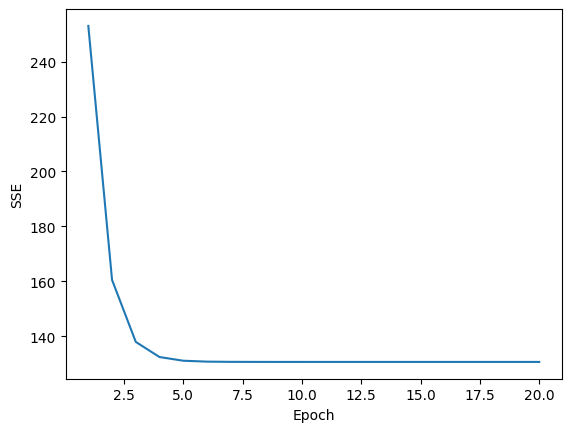

In [10]:
sns.reset_orig()
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [11]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

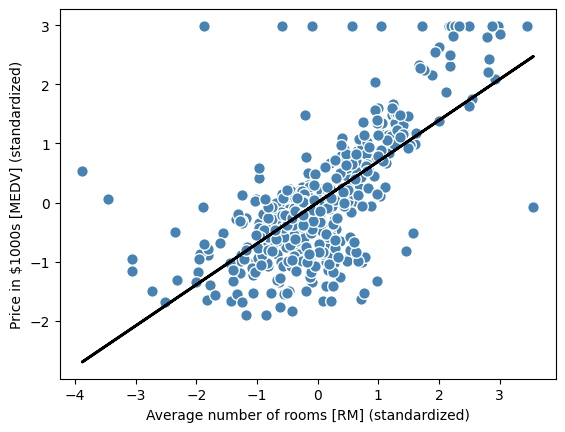

In [12]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

In [44]:

num_rooms_std = sc_x.transform([[5.0]])
price_std = lr.predict(num_rooms_std)
print("Price in $1000s: %.3f" % sc_y.inverse_transform([price_std]))

Price in $1000s: 10.840


C:\Users\Nazbeen-Ai\AppData\Local\Temp\ipykernel_6668\2974754390.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Price in $1000s: %.3f" % sc_y.inverse_transform([price_std]))


In [45]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.695
Intercept: -0.000


􀀨􀁖􀁗􀁌􀁐􀁄􀁗􀁌􀁑􀁊􀀃􀁆􀁒􀁈􀁉􀂿􀁆􀁌􀁈􀁑􀁗􀀃􀁒􀁉􀀃􀁄􀀃􀁕􀁈􀁊􀁕􀁈􀁖􀁖􀁌􀁒􀁑􀀃􀁐􀁒􀁇􀁈􀁏􀀃
via scikit-learn

In [46]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)


Slope: 9.102
Intercept: -34.671


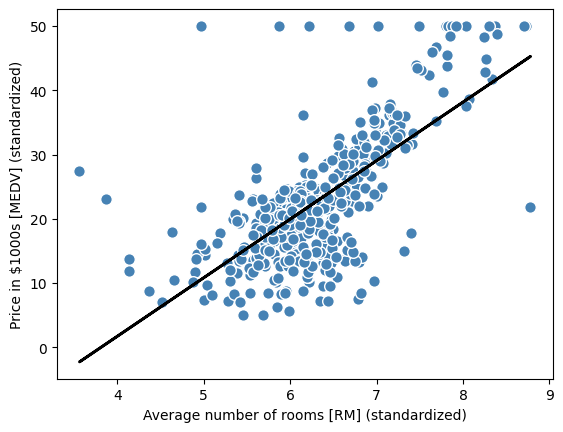

In [47]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

Fitting a robust regression model using
RANSAC

In [48]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         loss='absolute_error',
                         residual_threshold=5.0,
                         random_state=0)
ransac.fit(X, y)

RANSACRegressor(estimator=LinearRegression(), min_samples=50, random_state=0,
                residual_threshold=5.0)

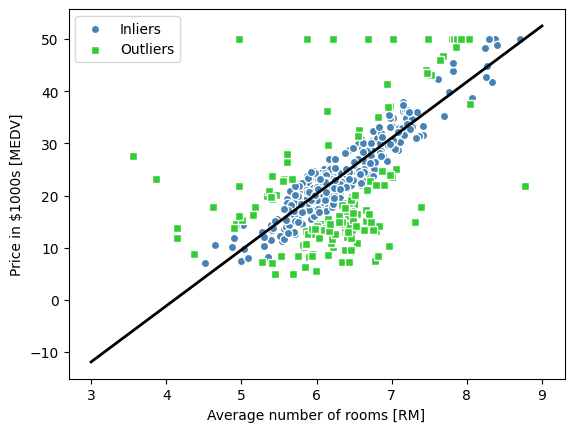

In [49]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
c='steelblue', edgecolor='white',
marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
c='limegreen', edgecolor='white',
marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')
plt.show()

In [50]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.735
Intercept: -44.089


Evaluating the performance of linear
regression models

In [51]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

slr = LinearRegression()
slr.fit(X_train, y_train)

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

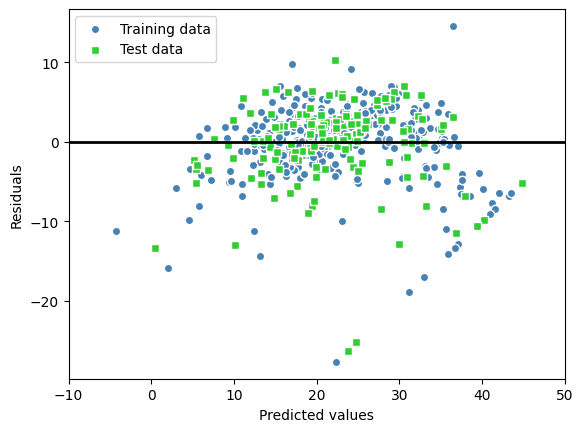

In [52]:
plt.scatter(y_train_pred, y_train_pred - y_train,c='steelblue', marker='o', edgecolor='white',
label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white',
label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

Let's compute the MSE of our training and test predictions:

In [53]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % ( mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196


In [54]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R^2 train: 0.765, test: 0.673


􀀸􀁖􀁌􀁑􀁊􀀃􀁕􀁈􀁊􀁘􀁏􀁄􀁕􀁌􀁝􀁈􀁇􀀃􀁐􀁈􀁗􀁋􀁒􀁇􀁖􀀃􀁉􀁒􀁕􀀃􀁕􀁈􀁊􀁕􀁈􀁖􀁖􀁌􀁒􀁑
As we discussed in Chapter 3, 􀀤􀀃􀀷􀁒􀁘􀁕􀀃􀁒􀁉􀀃􀀰􀁄􀁆􀁋􀁌􀁑􀁈􀀃􀀯􀁈􀁄􀁕􀁑􀁌􀁑􀁊􀀃􀀦􀁏􀁄􀁖􀁖􀁌􀃀􀁈􀁕􀁖􀀃􀀸􀁖􀁌􀁑􀁊􀀃
􀁖􀁆􀁌􀁎􀁌􀁗􀀐􀁏􀁈􀁄􀁕􀁑, regularization is one approach to tackle the problem of 􀁒􀁙􀁈􀁕􀃀􀁗􀁗􀁌􀁑􀁊􀀃􀁅􀁜􀀃
adding additional information, and thereby shrinking the parameter values of the
model to induce a penalty against complexity.

A Ridge regression model can be initialized via:

In [55]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

Note that the regularization strength is regulated by the parameter alpha, which is
similar to the parameter λ . Likewise, we can initialize a LASSO regressor from the
linear_model submodule:

In [56]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

Lastly, the ElasticNet implementation allows us to vary the L1 to L2 ratio:

In [61]:
from sklearn.linear_model import ElasticNet

elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)
elanet.fit(X_train, y_train)

y_train_pred = elanet.predict(X_train)
y_test_pred = elanet.predict(X_test)

In [62]:
print('MSE train: %.3f, test: %.3f' % ( mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))


MSE train: 24.381, test: 31.874


Turning a linear regression model into a curve - polynomial regression

Adding polynomial terms using scikit-learn

### 1 Add a second degree polynomial term:


In [63]:

from sklearn.preprocessing import PolynomialFeatures
X = np.array([ 258.0, 270.0, 294.0, 320.0, 342.0,
368.0, 396.0, 446.0, 480.0, 586.0])\
[:, np.newaxis]
y = np.array([ 236.4, 234.4, 252.8, 298.6, 314.2,
342.2, 360.8, 368.0, 391.2, 390.8])
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

### 2. Fit a simple linear regression model for comparison:

In [64]:
lr.fit(X, y)
X_fit = np.arange(250,600,10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

### 3. Fit a multiple regression model on the transformed features for polynomial
regression:

In [67]:
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

### 4. Plot the results:

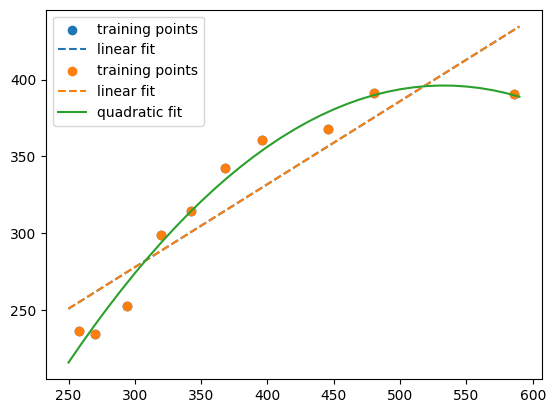

In [68]:
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit,
label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit,
label='quadratic fit')
plt.legend(loc='upper left')
plt.show()

In [69]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print('Training MSE linear: %.3f, quadratic: %.3f' % ( mean_squared_error(y, y_lin_pred), mean_squared_error(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330


In [70]:
print('Training R^2 linear: %.3f, quadratic: %.3f' % ( r2_score(y, y_lin_pred), r2_score(y, y_quad_pred)))

Training R^2 linear: 0.832, quadratic: 0.982


Modeling nonlinear relationships in the
Housing dataset

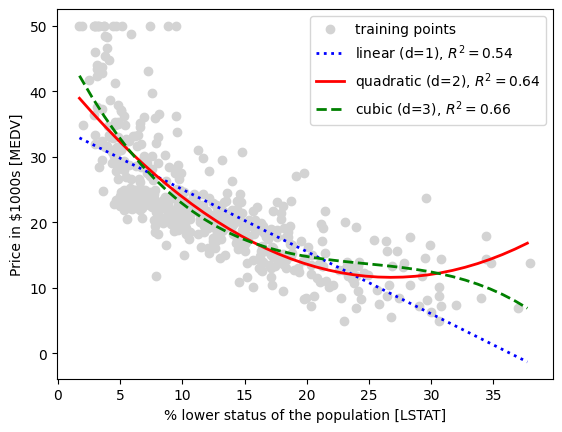

In [72]:
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X, y)

y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))

cubic_r2 = r2_score(y, regr.predict(X_cubic))

plt.scatter(X, y, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit,
label='linear (d=1), $R^2=%.2f$' % linear_r2,
color='blue',
lw=2,
linestyle=':')
plt.plot(X_fit, y_quad_fit,
label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
color='red',
lw=2,
linestyle='-')
plt.plot(X_fit, y_cubic_fit,
label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
color='green',
lw=2,
linestyle='--')
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')
plt.show()

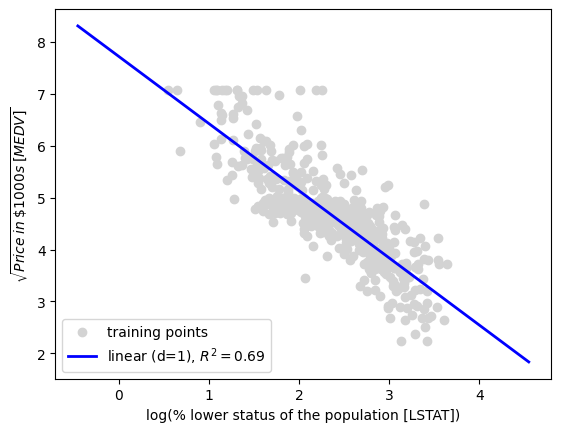

In [74]:
# transform features
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# fit features
X_fit = np.arange(X_log.min()-1,
X_log.max()+1, 1)[:, np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# plot results
plt.scatter(X_log, y_sqrt,
label='training points',
color='lightgray')
plt.plot(X_fit, y_lin_fit,
label='linear (d=1), $R^2=%.2f$' % linear_r2,
color='blue',lw=2)
plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')
plt.show()

### Dealing with nonlinear relationships using random forests

In this section, we are going to take a look at random forest regression, which
is conceptually different from the previous regression models in this chapter. A
random forest, which is an ensemble of multiple decision trees, can be understood as
the sum of piecewise linear functions in contrast to the global linear and polynomial
regression models that we discussed previously. In other words, via the decision tree
algorithm, we are subdividing the input space into smaller regions that become more
manageable

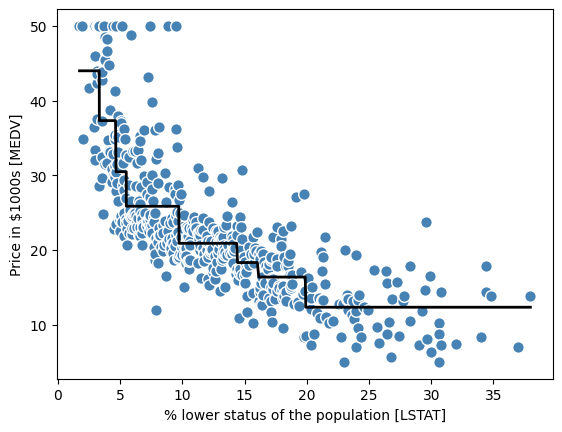

In [75]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values

y = df['MEDV'].values

tree = DecisionTreeRegressor(max_depth=3)

tree.fit(X, y)

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)

plt.xlabel('% lower status of the population [LSTAT]')

plt.ylabel('Price in $1000s [MEDV]')

plt.show()

In [79]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test =\
train_test_split(X, y,
test_size=0.4,
random_state=1)
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000,criterion='absolute_error',random_state=1,n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % ( mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))


MSE train: 1.941, test: 11.742
R^2 train: 0.976, test: 0.870


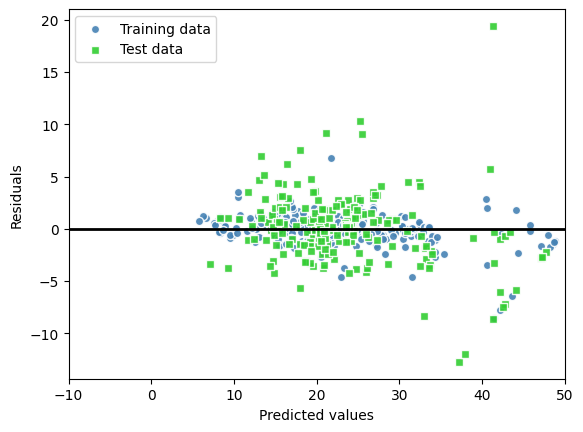

In [80]:
plt.scatter(y_train_pred,
y_train_pred - y_train,
c='steelblue',
edgecolor='white',
marker='o',
s=35,
alpha=0.9,
label='Training data')
plt.scatter(y_test_pred,
y_test_pred - y_test,
c='limegreen',
edgecolor='white',
marker='s',
s=35,
alpha=0.9,
label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.show()